Original File formatted as follws:


SETTLEMET_DATA: date in format dd/mm/yyyy

SETTLEMENT_PERIOD: half hourly period for the historic outtunr occurred

ND (National Demand). National Demand is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. National Demand is calculated as a sum of generation based on National Grid ESO operational generation metering. Measured in MW.

TSD (Transmission System Demand). Transmission System Demand is equal to the ND plus the additional generation required to meet station load, pump storage pumping and interconnector exports. Measured in MW.

ENGLAND_WALES_DEMAND. England and Wales Demand, as ND above but on an England and Wales basis. Measured in MW.

EMBEDDED_WIND_GENERATION. This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. These wind farms are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high wind. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.

EMBEDDED_WIND_CAPACITY. This is National Grid ESO’s best view of the installed embedded wind capacity in GB. This is based on publicly available information compiled from a variety of sources and is not the definitive view. It is consistent with the generation estimate provided above. Measured in MW.

EMBEDDED_SOLAR_GENERATION. This is an estimate of the GB solar generation from PV panels. These are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high radiation. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.

EMBEDDED_SOLAR_CAPACITY. As embedded wind capacity above, but for solar generation. Measured in MW.

NON_BM_STOR (Non-Balancing Mechanism SHort-Term Operating Reserve). For units that are not included in the ND generator definition. This can be in the form of generation or demand reduction. Measured in MW.

PUMP_STORAGE_PUMPING. The demand due to pumping at hydro pump storage units; the -ve signifies pumping load.

IFA_FLOW (IFA Interconnector Flow). The flow on on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

IFA2_FLOW (IFA Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

MOYLE_FLOW (Moyle Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

EAST_WEST_FLOW (East West Innterconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

NEMO_FLOW (Nemo Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

NSL_FLOW (North Sea Link Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

ELCLINK_FLOW. Blank

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(r"C:\Users\2313758A\OneDrive - University of Glasgow\13. Python\Kaggle Datasets\Electricity consumption UK 2009-2024\historic_demand_2009_2024_noNaN.csv", low_memory=False)

In [6]:
df.head()

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [7]:
print(df.columns)
print(df.shape)

Index(['settlement_date', 'settlement_period', 'period_hour', 'nd', 'tsd',
       'england_wales_demand', 'embedded_wind_generation',
       'embedded_wind_capacity', 'embedded_solar_generation',
       'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping',
       'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow',
       'nemo_flow', 'is_holiday'],
      dtype='object')
(278512, 19)


In [8]:
df["settlement_date"] = pd.to_datetime(df["settlement_date"])
df = df.set_index("settlement_date")

In [17]:
df = df.sort_index()
df.head()

,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
settlement_date,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


Can see that the data is in 30min intervals.

In [19]:
df = df.asfreq("30min")
print(df.index.freq)

<30 * Minutes>


In [22]:
print(df[["nd", "tsd", "england_wales_demand"]].head())
print(df[["nd", "tsd", "england_wales_demand"]].describe())

                          nd      tsd  england_wales_demand
settlement_date                                            
2009-01-01 00:00:00  37910.0  38704.0               33939.0
2009-01-01 00:30:00  38047.0  38964.0               34072.0
2009-01-01 01:00:00  37380.0  38651.0               33615.0
2009-01-01 01:30:00  36426.0  37775.0               32526.0
2009-01-01 02:00:00  35687.0  37298.0               31877.0
                  nd            tsd  england_wales_demand
count  278512.000000  278512.000000         278512.000000
mean    31187.041370   32685.811143          28389.589217
std      7831.306542    7598.781279           7091.113104
min     13367.000000   16513.000000              0.000000
25%     24907.750000   26608.000000          22676.750000
50%     30491.000000   31800.000000          27753.000000
75%     36914.000000   38112.000000          33616.000000
max     59095.000000   60147.000000          53325.000000


Best target would be national demand I believe. AS this represents overall sytsem load.

In [24]:
target = df["nd"]

In [104]:
def figure_design():
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis="both",direction="in")

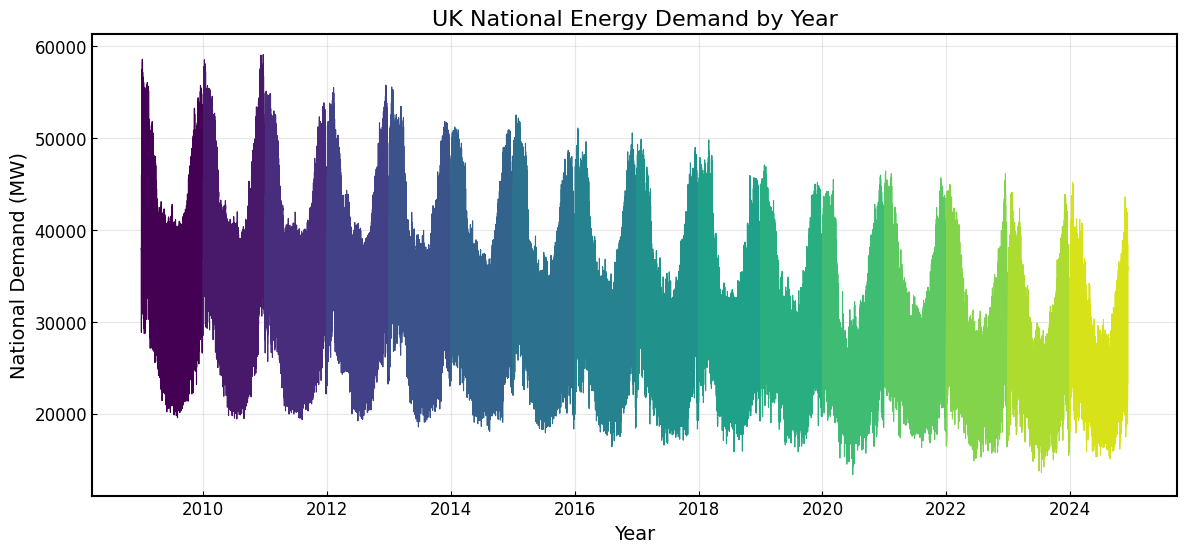

In [105]:
plt.figure(figsize=(14, 6))

years = np.arange(2009, 2025)
cmap = plt.cm.viridis

for i, year in enumerate(years):
    df_year = df.loc[str(year)]
    color = cmap(i / len(years))
    line, = plt.plot(df_year.index, df_year['nd'],
             linewidth=0.8,
             color=color,
             label=str(year))

figure_design()

plt.title("UK National Energy Demand by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("National Demand (MW)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


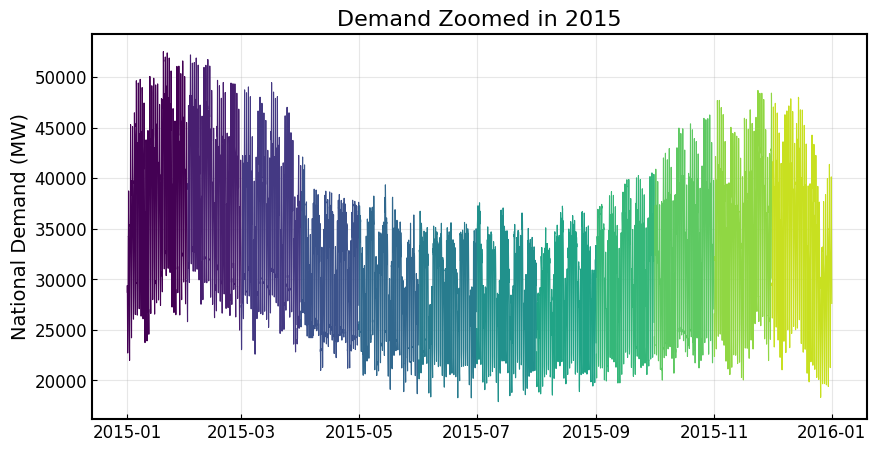

In [138]:
target_year = 2015
months = range(1, 13)
cmap = plt.cm.viridis

plt.figure(figsize=(10,5))

for i, month in enumerate(months):
    month_str = f"{target_year}-{month}"
    df_month = df.loc[month_str]
    
    color = cmap(i / len(months))
    
    plt.plot(df_month.index, df_month["nd"],
                     linewidth=0.8,
                     color=color)

figure_design()
plt.title("Demand Zoomed in 2015", fontsize=16)

plt.ylabel("National Demand (MW)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

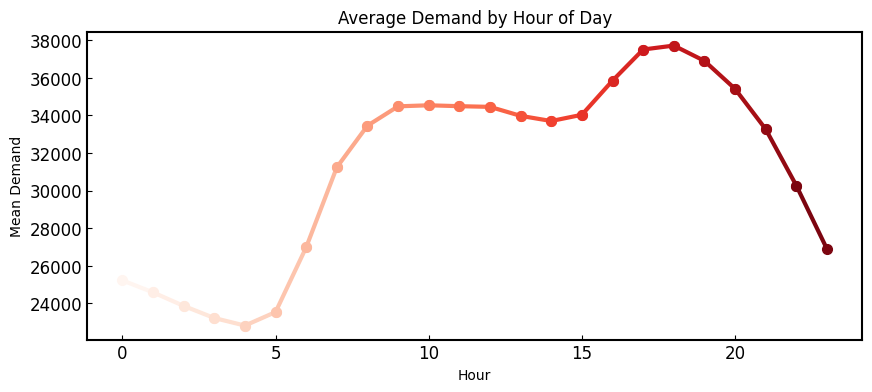

In [111]:
df["hour"] = df.index.hour
hourly_mean = df.groupby("hour")["nd"].mean()

cmap = plt.cm.Reds
colors = cmap(np.linspace(0, 1, 24))

hours = hourly_mean.index
values = hourly_mean.values

plt.figure(figsize=(10,4))

for i in range(23):    
    plt.plot([hours[i], hours[i+1]],
                [values[i], values[i+1]],
                color=colors[i],
                marker='o',
                linewidth=3,
                markersize=7)

figure_design()
plt.title("Average Demand by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Mean Demand")
plt.show()

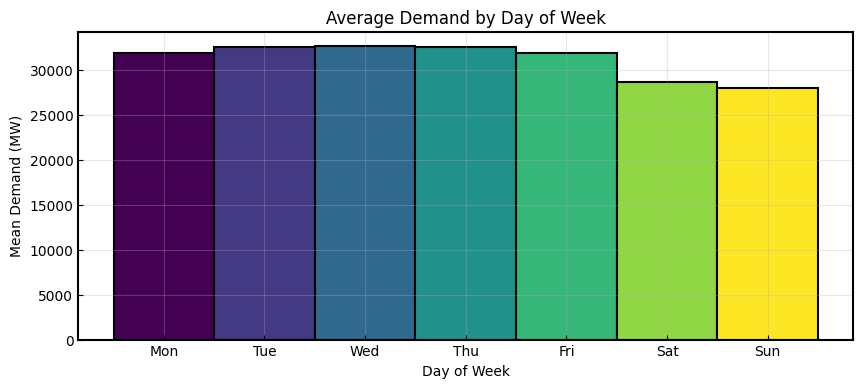

In [99]:
df["DayOfWeek"] = df.index.day_of_week
dow_mean = df.groupby("DayOfWeek")["nd"].mean()
dow_mean.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

colors = plt.cm.viridis(np.linspace(0, 1, 7))
plt.figure(figsize=(10, 4))
bares = plt.bar(dow_mean.index, dow_mean.values, color=colors, width=1, edgecolor="black", linewidth=1.5)
figure_design()
plt.title("Average Demand by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Mean Demand (MW)")
plt.show()

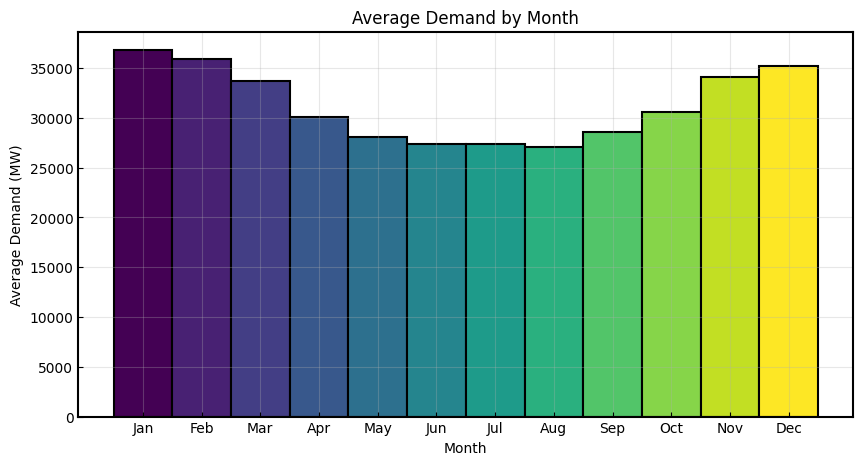

In [103]:
df["month"] = df.index.month
month_mean = df.groupby("month")["nd"].mean()
month_mean.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

colors = plt.cm.viridis(np.linspace(0, 1, 12))
plt.figure(figsize=(10, 5))
bar = plt.bar(month_mean.index, month_mean.values, color=colors, width=1, edgecolor="black", linewidth=1.5)

figure_design()
plt.title("Average Demand by Month")
plt.xlabel("Month")
plt.ylabel("Average Demand (MW)")
plt.show()